## Praktikum 1

In [ ]:
class SegmentTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (2 * size)

    def update_value(self, index, value):
        index += self.size
        self.tree[index] = value

        while index > 1:
            index //= 2
            self.tree[index] = max(self.tree[2 * index], self.tree[2 * index + 1])

    def query(self, left, right):
        left += self.size
        right += self.size
        result = 0

        while left < right:
            if left % 2 == 1:
                result = max(result, self.tree[left])
                left += 1

            if right % 2 == 1:
                right -= 1
                result = max(result, self.tree[right])

            left //= 2
            right //= 2

        return result

def visualize_segment_tree(segment_tree):
    print("Segment Tree:")
    for i in range(segment_tree.size):
        print(segment_tree.tree[i + segment_tree.size:])
    print()

def visualize_lis_lengths(lis_lengths):
    print("LIS Lengths:", lis_lengths)
    print()

# Fungsi untuk mencari panjang dari Largest Monotonically Increasing Subsequence.
def longest_increasing_subsequence_length(nums):
    n = len(nums)
    index_mapping = {num: i for i, num in enumerate(sorted(set(nums)))}
    segment_tree = SegmentTree(len(index_mapping))
    lis_lengths = [0] * n

    for i, num in enumerate(nums):
        index = index_mapping[num]
        lis_lengths[i] = segment_tree.query(0, index) + 1
        segment_tree.update_value(index, lis_lengths[i])

        # Visualization
        visualize_lis_lengths(lis_lengths)
        visualize_segment_tree(segment_tree)

    return max(lis_lengths)

nums = [4, 1, 13, 7, 0, 2, 8, 11, 3]
result = longest_increasing_subsequence_length(nums)
print("Panjang Largest Monotonically Increasing Subsequence:", result)


LIS Lengths: [1, 0, 0, 0, 0, 0, 0, 0, 0]

Segment Tree:
[0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0]
[0, 0]
[0]

LIS Lengths: [1, 1, 0, 0, 0, 0, 0, 0, 0]

Segment Tree:
[0, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0]
[0, 0]
[0]

LIS Lengths: [1, 1, 2, 0, 0, 0, 0, 0, 0]

Segment Tree:
[0, 1, 0, 0, 1, 0, 0, 0, 2]
[1, 0, 0, 1, 0, 0, 0, 2]
[0, 0, 1, 0, 0, 0, 2]
[0, 1, 0, 0, 0, 2]
[1, 0, 0, 0, 2]
[0, 0, 0, 2]
[0, 0, 2]
[0, 2]
[2]

LIS Lengths: [1, 1, 2, 2, 0, 0, 0, 0, 0]

Segment Tree:
[0, 1, 0, 0, 1, 2, 0, 0, 2]
[1, 0, 0, 1, 2, 0, 0, 2]
[0, 0, 1, 2, 0, 0, 2]
[0, 1, 2, 0, 0, 2]
[1, 2, 0, 0, 2]
[2, 0, 0, 2]
[0, 0, 2]
[0, 2]
[2]

LIS Lengths: [1, 1, 2, 2, 1, 0, 0, 0, 0]

Segment Tree:
[1, 1, 0, 0, 1, 2, 0, 0, 2]
[1, 0, 0, 1, 2, 0, 0, 2]
[0, 0, 1, 2, 0, 0, 2]
[0, 1, 2, 0, 0, 2]
[1, 2, 0, 0, 2]
[2, 0, 0, 2]
[0, 0, 2]
[0, 2]


# Praktikum 2


## Open Tour


[1, 47, 62, 34, 31, 18, 9, 36]
[61, 54, 32, 46, 10, 35, 30, 17]
[48, 2, 44, 37, 33, 28, 19, 8]
[53, 60, 39, 27, 45, 11, 16, 29]
[59, 49, 3, 43, 38, 24, 7, 20]
[63, 52, 56, 40, 26, 21, 12, 15]
[50, 58, 42, 4, 23, 14, 25, 6]
[55, 64, 51, 57, 41, 5, 22, 13]


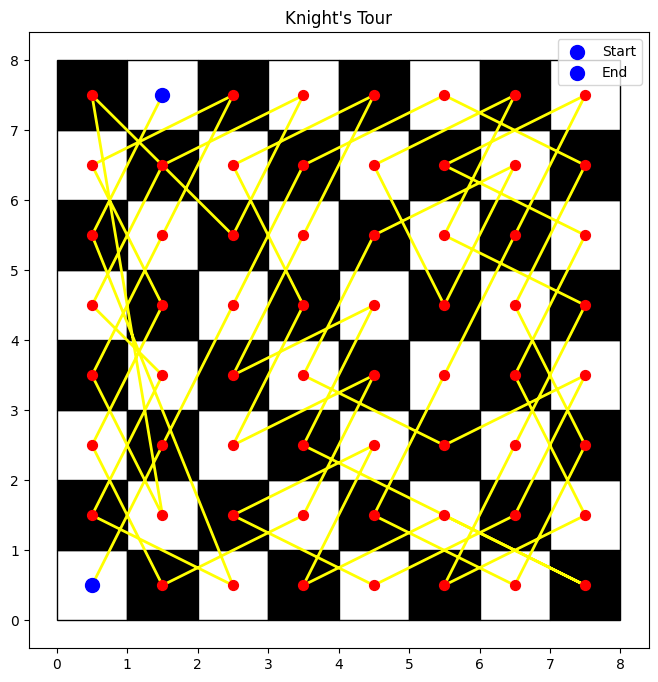

In [ ]:
# import matplot untuk visualisasi papan catur yang dilalui
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class KnightGraph:
    # Inisialisasi objek KnightGraph dengan ukuran papan catur (n).
    def __init__(self, n):
        self.n = n
        self.graph = {i * n + j: [] for i in range(n) for j in range(n)}
        self.moves = [(2, 1), (1, 2), (-1, 2), (-2, 1),
                      (-2, -1), (-1, -2), (1, -2), (2, -1)]

    # Memeriksa apakah langkah yang diinginkan oleh kuda masih berada dalam batas papan catur.
    def is_legal_move(self, x, y):
        return 0 <= x < self.n and 0 <= y < self.n

    # memeriksa kemungkinan gerakan kuda dan menambahkan edge pada graf jika gerakan
    # tersebut legal, sesuai dengan aturan pergerakan kuda pada catur.
    def generate_graph(self):
        for i in range(self.n):
            for j in range(self.n):
                current_node = i * self.n + j
                for move in self.moves:
                    x, y = i + move[0], j + move[1]
                    if self.is_legal_move(x, y):
                        next_node = x * self.n + y
                        self.graph[current_node].append(next_node)

    # visualisasi pada board
    def print_board(self, tour):
        x = [coord % self.n + 0.5 for coord in tour]
        y = [coord // self.n + 0.5 for coord in tour]

        plt.figure(figsize=(8, 8))
        plt.title('Knight\'s Tour')

        # Gambar papan catur
        for i in range(self.n):
            for j in range(self.n):
                color = 'white' if (i + j) % 2 == 0 else 'black'
                plt.gca().add_patch(patches.Rectangle((i, j), 1, 1, linewidth=1, edgecolor='black', facecolor=color))

        plt.scatter(x, y, color='red', s=50, zorder=2)  # Titik
        plt.plot(x, y, color='yellow', linestyle='-', linewidth=2, zorder=1)  # Garis Kuning

        # Titik Awal dan Akhir, dan penentuan warnanya
        plt.scatter(x[0], y[0], color='blue', s=100, label='Start', zorder=3)  # Titik Awal
        plt.scatter(x[-1], y[-1], color='blue', s=100, label='End', zorder=3)  # Titik Akhir

        plt.legend()
        plt.show()

    # menampilkan representasi papan catur dengan langkah-langkah perjalanan kuda di terminal.
    def print_terminal(self, tour):
        board = [[0] * self.n for _ in range(self.n)]
        i = 1
        for tile in tour:
            row, col = divmod(tile, self.n)
            board[row][col] = i
            i += 1

        for row in board:
            print(row)

    # menghasilkan dan menampilkan perjalanan kuda pada papan catur, baik dalam bentuk
    # representasi terminal maupun visualisasi menggunakan Matplotlib.
    def generate_tour(self, start_node):
        visited = set()
        tour = []

        def dfs(node):
            nonlocal tour
            tour.append(node)
            visited.add(node)
            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    dfs(neighbor)

        dfs(start_node)
        self.print_terminal(tour)
        self.print_board(tour)
        return tour

# Driver Code
# membuat dan mengeksekusi tur kuda pada papan catur berukuran 8x8
n = 8  # Board size
knight_graph = KnightGraph(n)
knight_graph.generate_graph()

start_x = 0
start_y = 0
start_node = start_y * n + start_x

tour = knight_graph.generate_tour(start_node)

## Closed Tour

In [33]:
def print_tour(tour):
    for i in range(N):
        for j in range(N):
            print("(%d, %d, %d)\t" % (tour[j * N + i], i, j), end="")
        print()

def findClosedTour(start_x, start_y):
    tour = [-1] * N * N
    current_tile = CurrentTile(start_x, start_y)
    tour[current_tile.y * N + current_tile.x] = 1

    next_tile = None
    for i in range(N * N - 1):
        next_tile = nextMove(tour, current_tile)
        if next_tile is None:
            return False

    if not neighbour(next_tile.x, next_tile.y, start_x, start_y):
        return False

    tour[start_y * N + start_x] = tour[(current_tile.y) * N + (current_tile.x)] + 1
    print_tour(tour)

    return True

start_x = 1
start_y = 1

while not findClosedTour(start_x, start_y):
    continue


(43, 0, 0)	(14, 0, 1)	(47, 0, 2)	(12, 0, 3)	(57, 0, 4)	(24, 0, 5)	(49, 0, 6)	(10, 0, 7)	
(46, 1, 0)	(65, 1, 1)	(44, 1, 2)	(23, 1, 3)	(48, 1, 4)	(11, 1, 5)	(58, 1, 6)	(25, 1, 7)	
(15, 2, 0)	(42, 2, 1)	(13, 2, 2)	(64, 2, 3)	(31, 2, 4)	(56, 2, 5)	(9, 2, 6)	(50, 2, 7)	
(2, 3, 0)	(45, 3, 1)	(22, 3, 2)	(55, 3, 3)	(34, 3, 4)	(51, 3, 5)	(26, 3, 6)	(59, 3, 7)	
(21, 4, 0)	(16, 4, 1)	(41, 4, 2)	(32, 4, 3)	(63, 4, 4)	(30, 4, 5)	(35, 4, 6)	(8, 4, 7)	
(40, 5, 0)	(3, 5, 1)	(54, 5, 2)	(19, 5, 3)	(52, 5, 4)	(33, 5, 5)	(60, 5, 6)	(27, 5, 7)	
(17, 6, 0)	(20, 6, 1)	(5, 6, 2)	(38, 6, 3)	(29, 6, 4)	(62, 6, 5)	(7, 6, 6)	(36, 6, 7)	
(4, 7, 0)	(39, 7, 1)	(18, 7, 2)	(53, 7, 3)	(6, 7, 4)	(37, 7, 5)	(28, 7, 6)	(61, 7, 7)	


## Additional


In [21]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class CurrentTile:
    def __init__(self, x, y):
        self.x = x
        self.y = y

N = 8

moves_x = [1, 1, 2, 2, -1, -1, -2, -2]
moves_y = [2, -2, 1, -1, 2, -2, 1, -1]

def isLegal(x, y):
    return ((x >= 0 and y >= 0) and (x < N and y < N))

def isempty(tour, x, y):
    return (isLegal(x, y)) and (tour[y * N + x] < 0)

def getDegree(tour, x, y):
    count = 0
    for i in range(N):
        if isempty(tour, (x + moves_x[i]), (y + moves_y[i])):
            count += 1
    return count

def nextMove(tour, CurrentTile):
    min_degree_index = -1
    degree = 0
    min_degree = (N + 1)
    next_moves_x = 0
    next_moves_y = 0

    start = random.randint(0, 1000) % N
    for count in range(0, N):
        i = (start + count) % N
        next_moves_x = CurrentTile.x + moves_x[i]
        next_moves_y = CurrentTile.y + moves_y[i]
        degree = getDegree(tour, next_moves_x, next_moves_y)
        if ((isempty(tour, next_moves_x, next_moves_y)) and degree < min_degree):
            min_degree_index = i
            min_degree = degree

    if (min_degree_index == -1):
        return None

    next_moves_x = CurrentTile.x + moves_x[min_degree_index]
    next_moves_y = CurrentTile.y + moves_y[min_degree_index]

    if not isLegal(next_moves_x, next_moves_y) or not isempty(tour, next_moves_x, next_moves_y):
        # Jika langkah tidak valid, kembalikan None
        return None

    tour[next_moves_y * N + next_moves_x] = tour[(CurrentTile.y) * N + (CurrentTile.x)] + 1

    CurrentTile.x = next_moves_x
    CurrentTile.y = next_moves_y

    return CurrentTile


def print_tour(tour):
    for i in range(N):
        for j in range(N):
            print("%d\t" % tour[j * N + i], end="")
        print()

def neighbour(x, y, start_x, start_y):
    for i in range(N):
        if ((x + moves_x[i]) == start_x) and ((y + moves_y[i]) == start_y):
            return True
    return False

def findClosedTour(start_x, start_y):
    tour = [-1] * N * N
    current_tile = CurrentTile(start_x, start_y)
    tour[current_tile.y * N + current_tile.x] = 1

    next_tile = None
    for i in range(N * N - 1):
        next_tile = nextMove(tour, current_tile)
        if next_tile is None:
            return False

    if not neighbour(next_tile.x, next_tile.y, start_x, start_y):
        return False

    tour[start_y * N + start_x] = tour[(current_tile.y) * N + (current_tile.x)] + 1
    print_tour(tour)
    return True

# Driver Code
start_x = 0
start_y = 0

while not findClosedTour(start_x, start_y):
    continue


65	42	3	18	23	40	13	16	
4	19	64	41	14	17	24	39	
59	2	43	22	63	56	15	12	
20	5	58	55	44	47	38	25	
31	60	21	48	57	62	11	46	
6	49	32	61	54	45	26	37	
33	30	51	8	35	28	53	10	
50	7	34	29	52	9	36	27	


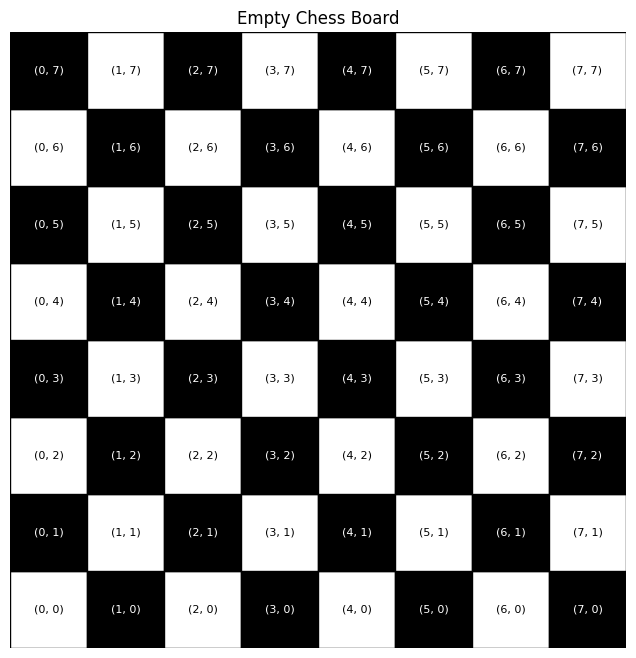

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class ChessBoard:
    def __init__(self, n):
        self.n = n

    def print_empty_board_with_coordinates(self):
        plt.figure(figsize=(8, 8))
        plt.title('Empty Chess Board')

        for i in range(self.n):
            for j in range(self.n):
                color = 'white' if (i + j) % 2 == 0 else 'black'
                text_color = 'black' if color == 'white' else 'white'

                plt.gca().add_patch(patches.Rectangle((i, j), 1, 1, linewidth=1, edgecolor='black', facecolor=color))

                plt.text(i + 0.5, j + 0.5, f'({i}, {j})', ha='center', va='center', fontsize=8, color=text_color)

        plt.xlim(0, self.n)
        plt.ylim(0, self.n)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.axis('off')  # Hide axis labels and ticks
        plt.show()

# Driver Code
n = 8  # Board size
chess_board = ChessBoard(n)
chess_board.print_empty_board_with_coordinates()
